In [1]:
# See http://www.wikimedecine.fr/Electrocardiogramme_(ECG)_-_%C3%A9l%C3%A9ments_d%27interpr%C3%A9tation

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime, time
from funs import *

import wfdb

In [2]:
sig, fields = wfdb.rdsamp('mimic2db/a40104/a40104_000000', pbdl=1, dldir='data')
print(fields)

File data/mimic2wdb/s00076/3924340_0004.hea is already present.
File data/mimic2wdb/s00076/3924340_0004.dat is already present.
(6765000, 5)
{'nseg': 1, 'nsig': 5, 'fs': 125.0, 'nsamp': 6765000, 'basetime': '18:51:20.648', 'basedate': '', 'filename': ['3924340_0004.dat', '3924340_0004.dat', '3924340_0004.dat', '3924340_0004.dat', '3924340_0004.dat'], 'fmt': ['16', '16', '16', '16', '16'], 'sampsperframe': [1, 1, 1, 1, 1], 'skew': [0, 0, 0, 0, 0], 'byteoffset': [0, 0, 0, 0, 0], 'gain': [1023.0, 1023.0, 512.0, 510.0, 512.0], 'units': ['pm', 'NU', 'mV', 'mV', 'mV'], 'baseline': [0, 0, 255, 256, 255], 'initvalue': [0, 478, 772, -32768, -32768], 'signame': ['RESP', 'PLETH', 'II', 'V', 'AVR'], 'nsampseg': [], 'comments': []}


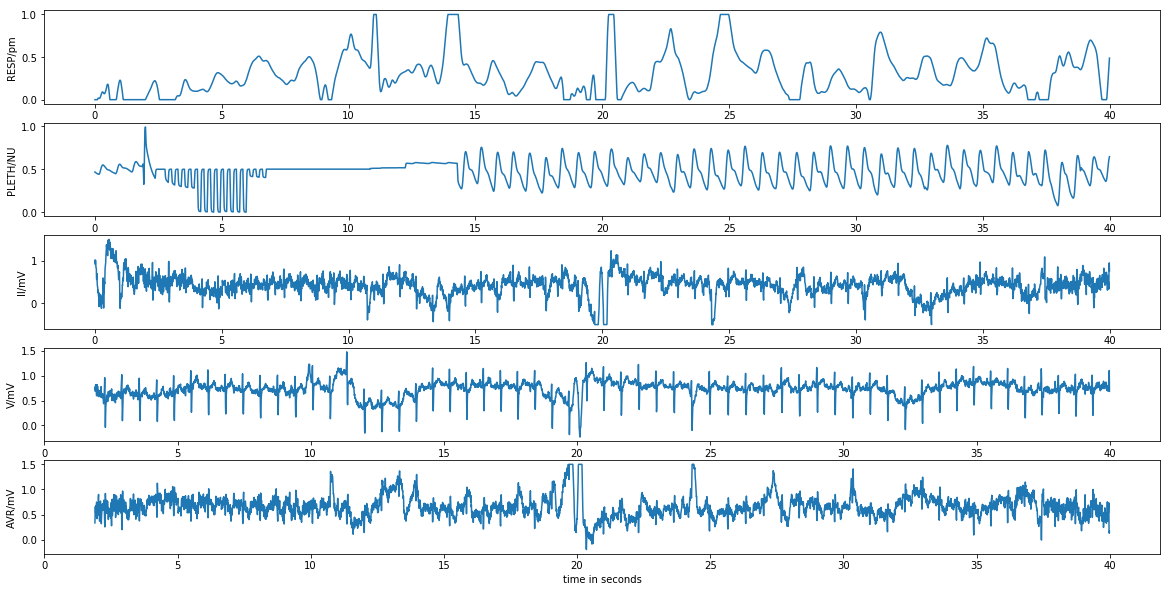

In [5]:
sig1 = sig[:5000]
myplot(sig1, fields)

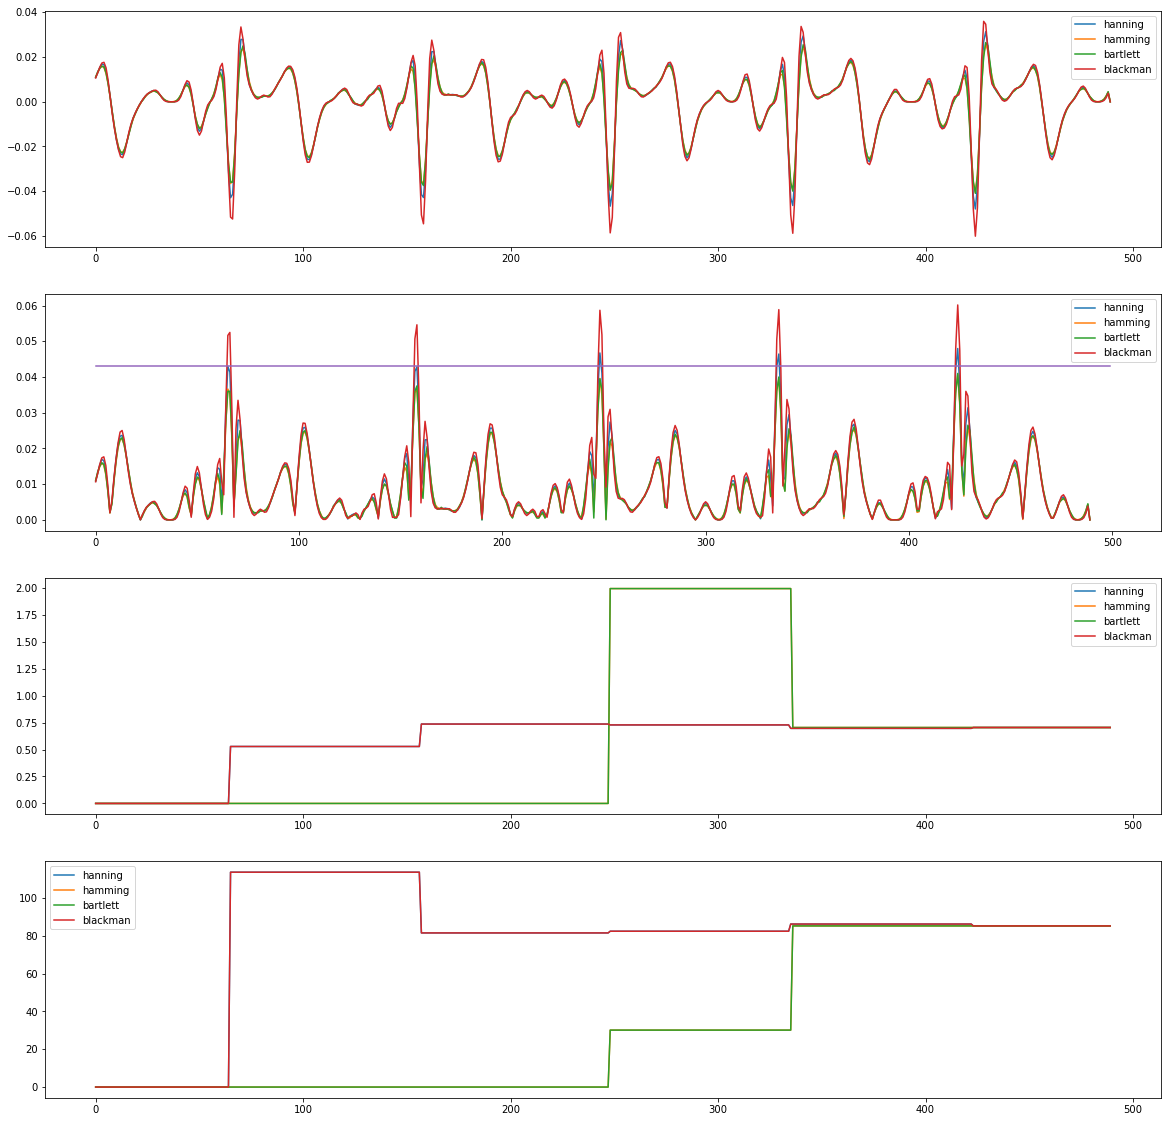

0.0421764152231


In [157]:
def get_rr(sig, window):
    smoothed = smooth(sig, window=window)[10:-10]
    signal_diff = np.diff(smoothed)
    signal_diff = np.append(signal_diff, 0)
    abs_diff = np.sqrt(signal_diff ** 2)
    ecg_threshold = np.average(abs_diff) * 4.5

    count = 0
    last_val = .0
    current_rr = .0
    current_rate = .0

    rr_intervals_array = []
    rr_intervals_rate = []

    for k, val in enumerate(abs_diff):
        count = count + 1
        if (val > ecg_threshold and last_val < ecg_threshold):
            current_rr = count / (fields['fs'])
            current_rate = 60.0 / current_rr
            count = 0
        last_val = val
        rr_intervals_array.append(current_rr)
        rr_intervals_rate.append(current_rate if current_rate < 220 else 0)

    return signal_diff, abs_diff, rr_intervals_array, rr_intervals_rate, ecg_threshold

def plot_rr2(sig, signal_diff, abs_diff, rr_intervals_array, rr_intervals_rate, ecg_threshold):
    fig, ax = plt.subplots(4, figsize=(20, 20))
    ax[0].plot(signal_diff)
    ax[1].plot(abs_diff)
    ax[1].plot([0, len(sig)-1], [ecg_threshold, ecg_threshold])
    ax[2].plot(rr_intervals_array, '.')
    ax[3].plot(rr_intervals_rate)
    plt.show()

def plot_rr(sig, window):
    plot_rr2(sig, *get_rr(sig, window))

windows = ['hanning', 'hamming', 'bartlett', 'blackman']

fig, ax = plt.subplots(4, figsize=(20, 20))
for window in windows:
    sd, ad, rra, rrr, ecg = get_rr(sig1[:, 0], window)
    ax[0].plot(sd, label=window)
    ax[1].plot(ad, label=window)
    ax[2].plot(rra, label=window)
    ax[3].plot(rrr, label=window)
    
ax[1].plot([0, len(sig1[:, 0])-1], [ecg, ecg])
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
fig.savefig('rr_different_windows.png', dpi=300)
plt.show()
#fig, ax = plt.subplots(4, figsize=(20, 20))


    
print(ecg_threshold)